<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9장 그림 및 예제 코드

In [ ]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm
import sympy

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
def plot_boundary(X, model, ax):
    # meshgrid를 짜서 Model에 포워드 시키기
    # 뉴럴 네트웍 모델 자체가 함수이므로 (x,y)->z를 하는 것이다.
    x = np.linspace(min(X[:,0]), max(X[:,0]))
    y = np.linspace(min(X[:,1]), max(X[:,1]))
    
    xx, yy = np.meshgrid(x, y)
    grid_tensor = torch.Tensor(np.c_[xx.flatten(), yy.flatten()])
    zz = model.forward(grid_tensor).detach().numpy().reshape(xx.shape)
    ax.contour(xx, yy, zz, cmap='gray', levels=[0.5])

def logistic(x):
    return 1 / (1+np.exp(-x))



## 샘플데이터 만들기

### 결정 경계

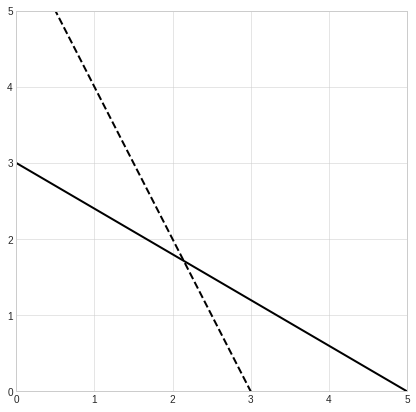

In [ ]:
dcs_bnd_1 = lambda x: -(3/5)*x + 3
dcs_bnd_1_imp = lambda x, y: (3)*x + (5)*y + (-15)

dcs_bnd_2 = lambda x: -2*x + 6
dcs_bnd_2_imp = lambda x, y: (-6)*x + (-3)*y + (18)

x = np.linspace(0, 5, 50)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dcs_bnd_1(x), color='k')
ax.plot(x, dcs_bnd_2(x), '--', color='k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

plt.show()

### 무작위점 500개 생성

In [ ]:
np.random.seed(3)

# 0~5에서 무작위 점 500개 추출
N = 500
samples = (np.random.rand(N*2)*5).reshape(N,2)

In [ ]:
samples.shape

(500, 2)

### 생성된 점 500개 그리기

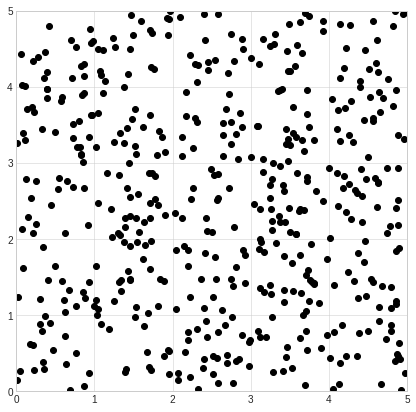

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(samples[:,0], samples[:,1], 'o', color='k')
ax.set_ylim(0, 5)
ax.set_xlim(0, 5)

plt.show()

## 샘플 데이터에 대한 레이블(타겟) 만들기

In [ ]:
y1_bin = dcs_bnd_1_imp(samples[:,0], samples[:,1]) > 0
y2_bin = dcs_bnd_2_imp(samples[:,0], samples[:,1]) < 0

In [ ]:
positive_where = np.where((y1_bin | y2_bin))[0]
target = np.zeros(N)
target[positive_where] = 1

print(target.shape)

(500,)


- 이제 다음처럼 데이터가 준비되었음

- `samples`: 점 500개게 (500, 2) 형태로 저장

- `target`: 각점에 대한 레이블 0, 1이 (500,) 형태로 저장

## 그림 9-1

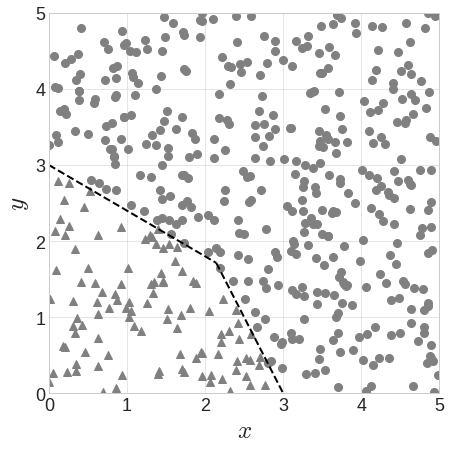

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(samples[np.where(target==1)[0],0], samples[np.where(target==1)[0],1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[np.where(target==0)[0],0], samples[np.where(target==0)[0],1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

x1 = np.linspace(0, 15/7, 50)
x2 = np.linspace(15/7, 3, 50)

ax.plot(x1, dcs_bnd_1(x1), '--', color='k')
ax.plot(x2, dcs_bnd_2(x2), '--', color='k')

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 9-3: $ 3x + 5y - 15 = 0 $ 로 분류

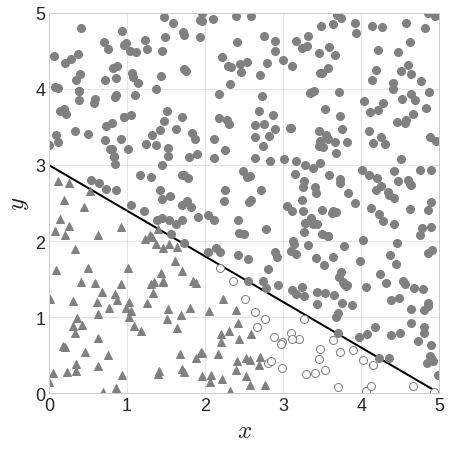

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(x, dcs_bnd_1(x), color='k')

ax.plot(samples[y1_bin, 0], samples[y1_bin,1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

not_y1_bin = np.invert(y1_bin)
not_y1_and_target = np.logical_and(not_y1_bin,target)

ax.plot(samples[not_y1_and_target, 0], samples[not_y1_and_target, 1], 'o',
        markerfacecolor='white', markeredgecolor='gray', markersize=8)

ax.plot(samples[np.where(target==0)[0], 0], samples[np.where(target==0)[0], 1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-3.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 9-5: $ -6x - 3y + 18 = 0 $로 분류

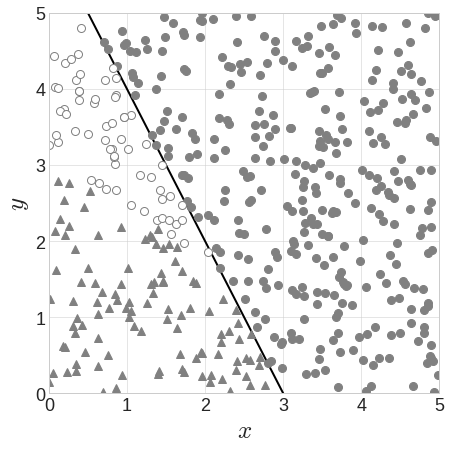

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(x, dcs_bnd_2(x), color='k')

ax.plot(samples[y2_bin, 0], samples[y2_bin, 1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

not_y2_bin = np.invert(y2_bin)
not_y2_and_target = np.logical_and(not_y2_bin,target)

ax.plot(samples[not_y2_and_target, 0], samples[not_y2_and_target, 1], 'o',
        markerfacecolor='white', markeredgecolor='gray', markersize=8)

ax.plot(samples[np.where(target==0)[0], 0], samples[np.where(target==0)[0], 1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-5.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 9-8: 위 두 경우를 합성하여 분류하는 경우

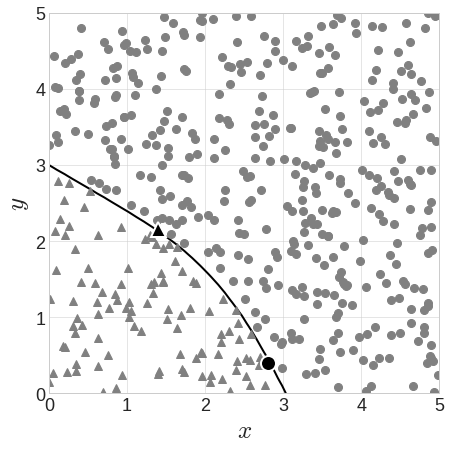

In [ ]:
xx, yy = np.meshgrid(x, x)

a, b, c = 10, -9, 4
o = lambda x, y: logistic( a*logistic(dcs_bnd_1_imp(x, y)) + b*logistic(dcs_bnd_2_imp(x, y)) + c )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

pred = o(samples[:,0], samples[:,1])
pred_pos = pred >= 0.5
pred_neg = pred < 0.5

ax.contour(xx, yy, o(xx,yy), cmap='gray', levels=[0.5])

# for positive samples
TP = np.logical_and(target==1, pred_pos)
FN = np.logical_and(target==1, pred_neg)

# for negative samples
TN = np.logical_and(target==0, pred_neg)
FP = np.logical_and(target==0, pred_pos)

ax.plot(samples[TP,0], samples[TP,1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[TN,0], samples[TN,1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.plot(samples[FN,0], samples[FN,1], 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)
ax.plot(samples[FP,0], samples[FP,1], '^', 
         markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)

ax.set_ylim(0,5)
ax.set_xlim(0,5)


if file_print == True :
    fig.savefig("imgs/chap9/fig9-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-8.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 9-9

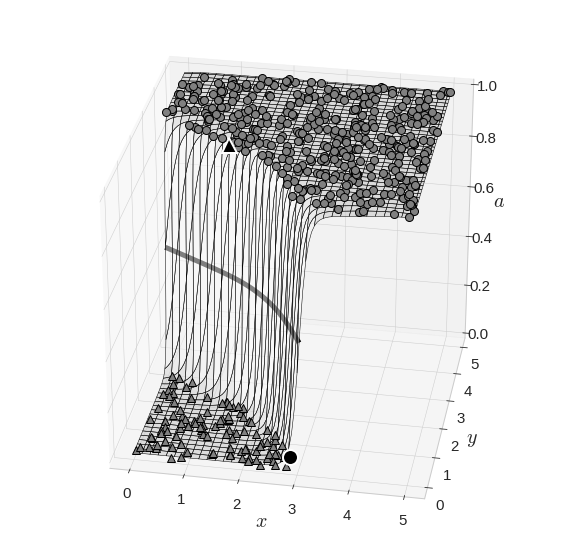

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

x1 = np.linspace(0, 5, 101)
x2 = np.linspace(0, 5, 101)

X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, o(X1, X2), linewidths=5, cmap='gray', levels=[0.5])
ax.plot_surface(X1, X2, o(X1, X2), color='w', edgecolor='k', alpha=0.5)

ax.plot3D(samples[TP,0], samples[TP,1], 1.0, 'o', 
        markerfacecolor='gray', markeredgecolor='k', markersize=8, zorder=10)

ax.plot3D(samples[TN,0], samples[TN,1], 0.0, '^', 
        markerfacecolor='gray', markeredgecolor='k', markersize=8, zorder=10)

ax.plot3D(samples[FN,0], samples[FN,1], 0.0, 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15, zorder=10)
ax.plot3D(samples[FP,0], samples[FP,1], 1.0, '^', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15, zorder=10)

ax.xaxis.set_tick_params(labelsize=15) 
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$a$', fontsize=20)
ax.view_init(30, -80)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-9.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## network 함수

In [ ]:
def network(X, W):
    """
    X : (N, D)
    W : (3, 3)
        [b^(1)_1, w^(1)_11, w^(1)_12]
        [b^(1)_2, w^(1)_21, w^(1)_22]
        [b^(2)_1, w^(2)_11, w^(2)_12]
    
    ret : (N,)
    
    D, H, A = 2, 2, 1
    """
    X = np.hstack( (np.ones(X.shape[0]).reshape(-1,1), X) ) # (N,D)->(N,D+1)
    Z1 = np.dot(W[:2,:], X.T) # (H,N)=(H,D+1)*(D+1,N)
    A1 = logistic(Z1)           # (H,N)
    A1 = np.vstack((np.ones(A1.shape[1]), A1)) # (H,N)->(H+1,N)
    Z = np.dot(W[-1,:], A1) # (H+1,)*(H+1,N)
    A2 = logistic(Z)         # (N,)
    
    return A2

## network 함수 검증

In [ ]:
W = np.array([ [-15, 3, 5], [18, -6, -3], [4, 10, -9] ])
pred = network(samples, W)

pred[pred>=0.5] = 1
pred[pred<0.5] = 0

result = pred==target

np.size(result) - np.count_nonzero(result)

2

In [ ]:
np.random.seed(17)
W = np.random.randn(9)

W.reshape(3,3)

array([[ 0.2763, -1.8546,  0.6239],
       [ 1.1453,  1.0372,  1.8866],
       [-0.1117, -0.3621,  0.1487]])

In [ ]:
pred = network(samples, W.reshape(3,3))

pred[pred>=0.5] = 1
pred[pred<0.5] = 0

result = pred==target

np.size(result) - np.count_nonzero(result)

163

In [ ]:
def J(W, X, T):
    """
    W: 함숫값을 결정하는 변수, 가중치 (9,)
    X: 주어진 점 데이터 X, X: (N,D)
    T: 데이터에 대한 클래스 T, 0 또는 1, T: (N,)
    """
    N = X.shape[0]
    W = W.reshape(3,3)
    
    Y = network(X, W)
    return (1/(2*N)) * ((T-Y)**2).sum()
    


In [ ]:
# 초기 상태에서 목적함숫값
J(W, samples, target)

0.1263148192185165

In [ ]:
from scipy import optimize

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html
W_star = optimize.fmin_cg(J, W, args=(samples, target),  gtol=1e-06)

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 313
         Function evaluations: 12694
         Gradient evaluations: 1154


In [ ]:
W_star = W_star.reshape(3,3)
W_star

array([[ 42.9811,  -9.4741, -13.7029],
       [-27.8283,   9.6497,   3.2045],
       [ 19.2321, -40.3183,  39.3389]])

## 그림 9-12

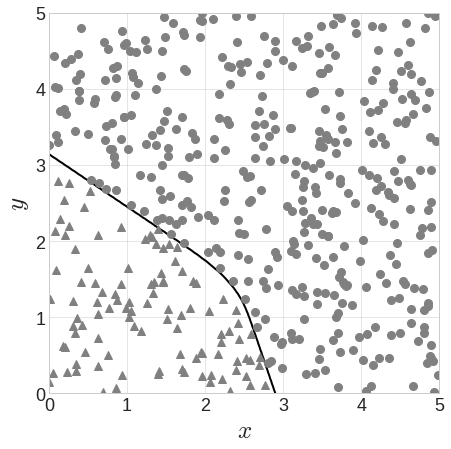

In [ ]:
x = np.linspace(0, 5, 200)

xx, yy = np.meshgrid(x, x)

dcs_bnd_1_imp_ = lambda x, y: W_star[0, 1]*x + W_star[0, 2]*y + W_star[0, 0] 
dcs_bnd_2_imp_ = lambda x, y: W_star[1, 1]*x + W_star[1, 2]*y + W_star[1, 0] 

a, b, c = W_star[2, 1], W_star[2, 2], W_star[2, 0] 
o = lambda x, y: logistic( a*logistic(dcs_bnd_1_imp_(x, y)) + b*logistic(dcs_bnd_2_imp_(x, y)) + c )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

pred = o(samples[:,0], samples[:,1])
pred_pos = pred >= 0.5
pred_neg = pred < 0.5

ax.contour(xx, yy, o(xx,yy), cmap='gray', levels=[0.5])

# for positive samples
TP = np.logical_and(target==1, pred_pos)
FN = np.logical_and(target==1, pred_neg)

# for negative samples
TN = np.logical_and(target==0, pred_neg)
FP = np.logical_and(target==0, pred_pos)

ax.plot(samples[TP,0], samples[TP,1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[TN,0], samples[TN,1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.plot(samples[FN,0], samples[FN,1], 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)
ax.plot(samples[FP,0], samples[FP,1], '^', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-12.pdf", format='pdf', bbox_inches='tight')
   
plt.show()

## 신경망 미분하기

In [ ]:
# pytorch를 임포트 한다.
import torch

### 순전파 함수(넘파이)

In [ ]:
def forward(X, W, T, retopt='all'):
    """
    네트워크를 피드포워드 시킨다. numpy 버전
    X : 네트워크의 입력벡터 shape:(N,2)
    retopt : 네트워크가 순전파되면서 각 레이어에서 계산된 결과 값을 
    되돌릴 방법을 설정한다.
        - 'all'  : 모든 층에서 계산된 결과를 튜플 형태로 되돌린다.
        - 'fval' : 함수의 최종 출력값만 되돌린다.
    """
    N = X.shape[0]
    
    H1 = np.dot(W[:2,1:], X.T)
    Z1 = H1 + W[:2,0].reshape(-1,1)
    A1 = logistic(Z1)
    
    H2 = np.dot(W[2,1:], A1)
    Z2 = H2 + W[2,0]
    A2 = logistic(Z2)

    C = (1/(2*N)) * ((T-A2)**2).sum()
    
    if retopt == 'all':
        return (H1, Z1, A1, H2, Z2, A2, C)
    elif retopt == 'fval':
        return C

### 순전파 함수(파이토치)

In [ ]:
def forward_torch(X, W, T, retopt='all'):
    """
    네트워크를 피드포워드 시킨다. pytorch 버전
    X : 네트워크의 입력벡터 size:(N,2)
    retopt : 네트워크가 순전파되면서 각 레이어에서 계산된 결과 값을 
    되돌릴 방법을 설정한다.
        - 'all'  : 모든 층에서 계산된 결과를 튜플 형태로 되돌린다.
        - 'fval' : 함수의 최종 출력값만 되돌린다.
    """
    N = X.size()[0]
    T = torch.tensor(T, dtype=torch.double)
    
    # 계산 결과 검증을 위해 pytorch를 사용하므로 numpy 어레이 뿐 아니라
    # pytorch tensor형태에 대해서도 동일한 연산을 한다.
    H1 = torch.mm(W[:2,1:], torch.t(X))
    Z1 = H1 + W[:2,0].view(-1,1)
    A1 = torch.sigmoid(Z1) #(2,1)
    
    H2 = torch.mm(W[2:,1:], A1)
    Z2 = H2 + W[2,0]
    A2 = torch.sigmoid(Z2)

    C = (1/(2*N)) * ((T-A2)**2).sum()
    
    if retopt == 'all':
        return (H1, Z1, A1, H2, Z2, A2, C)
    elif retopt == 'fval':
        return C

### 넘파이 어레이와 텐서 프린트 보조함수

In [ ]:
np.set_printoptions(precision=4, linewidth =150)

def print_tensor(t):
    """
    텐서형 자료를 보기 좋게 프린트하기 위한 보조 함수
    """
    def namestr(obj, namespace):
        return [name for name in namespace if namespace[name] is obj]
    
    var_name = namestr(t, globals())[0]
    
    print("{}:{},{}".format(var_name, t.shape, t.dtype))
    print(t)
    print("-------------------------------------------")

### 가중치 무작위 초기화

In [ ]:
np.random.seed(17)

W = np.random.randn(9).reshape(3,3)
W_torch = torch.tensor(W, dtype=torch.double); W_torch.requires_grad=True

print_tensor(W)
print_tensor(W_torch)

W:(3, 3),float64
[[ 0.2763 -1.8546  0.6239]
 [ 1.1453  1.0372  1.8866]
 [-0.1117 -0.3621  0.1487]]
-------------------------------------------
W_torch:torch.Size([3, 3]),torch.float64
tensor([[ 0.2763, -1.8546,  0.6239],
        [ 1.1453,  1.0372,  1.8866],
        [-0.1117, -0.3621,  0.1487]], dtype=torch.float64, requires_grad=True)
-------------------------------------------


### 초기 상태에서 목적함숫값

In [ ]:
# 초기 상태에서 목적함숫값
J(W, samples, target)

0.1263148192185165

In [ ]:
H1, Z1, A1, H2, Z2, A2, C = forward(samples, W, target)

C

0.1263148192185165

### 데이터 하나로 순전파 시키기

In [ ]:
N = 1
x = samples[[0]]
x_torch = torch.tensor(x, dtype=torch.double); x_torch.requires_grad=True
t = target[[0]]

print_tensor(x)
print_tensor(x_torch)
print_tensor(t)


x:(1, 2),float64
[[2.754  3.5407]]
-------------------------------------------
x_torch:torch.Size([1, 2]),torch.float64
tensor([[2.7540, 3.5407]], dtype=torch.float64, requires_grad=True)
-------------------------------------------
t:(1,),float64
[1.]
-------------------------------------------


In [ ]:
H1, Z1, A1, H2, Z2, A2, C = forward(x, W, t)

print_tensor(H1)
print_tensor(Z1)
print_tensor(A1)
print_tensor(H2)
print_tensor(Z2)
print_tensor(A2)
print_tensor(C)

H1:(2, 1),float64
[[-2.8986]
 [ 9.5365]]
-------------------------------------------
Z1:(2, 1),float64
[[-2.6223]
 [10.6818]]
-------------------------------------------
A1:(2, 1),float64
[[0.0677]
 [1.    ]]
-------------------------------------------
H2:(1,),float64
[0.1242]
-------------------------------------------
Z2:(1,),float64
[0.0125]
-------------------------------------------
A2:(1,),float64
[0.5031]
-------------------------------------------
C:(),float64
0.12344827837124746
-------------------------------------------


In [ ]:
H1_torch, Z1_torch, A1_torch, H2_torch, Z2_torch, A2_torch, C_torch = forward_torch(x_torch, W_torch, t)

print_tensor(H1_torch)
print_tensor(Z1_torch)
print_tensor(A1_torch)
print_tensor(H2_torch)
print_tensor(Z2_torch)
print_tensor(A2_torch)
print_tensor(C_torch)

H1_torch:torch.Size([2, 1]),torch.float64
tensor([[-2.8986],
        [ 9.5365]], dtype=torch.float64, grad_fn=<MmBackward>)
-------------------------------------------
Z1_torch:torch.Size([2, 1]),torch.float64
tensor([[-2.6223],
        [10.6818]], dtype=torch.float64, grad_fn=<AddBackward0>)
-------------------------------------------
A1_torch:torch.Size([2, 1]),torch.float64
tensor([[0.0677],
        [1.0000]], dtype=torch.float64, grad_fn=<SigmoidBackward>)
-------------------------------------------
H2_torch:torch.Size([1, 1]),torch.float64
tensor([[0.1242]], dtype=torch.float64, grad_fn=<MmBackward>)
-------------------------------------------
Z2_torch:torch.Size([1, 1]),torch.float64
tensor([[0.0125]], dtype=torch.float64, grad_fn=<AddBackward0>)
-------------------------------------------
A2_torch:torch.Size([1, 1]),torch.float64
tensor([[0.5031]], dtype=torch.float64, grad_fn=<SigmoidBackward>)
-------------------------------------------
C_torch:torch.Size([]),torch.float64
ten

### 단계별 계산

### $\frac{\partial C}{\partial \mathbf{a}^{(2)}}$: (1,1)

In [ ]:
dA2 = -(t-A2)/N
dA2

array([-0.4969])

In [ ]:
#                              종속변수, 독립변수, 종속변수와 곱해지는 상위 그래디언트 
dA2_torch = torch.autograd.grad(C_torch, A2_torch, torch.tensor(1, dtype=torch.double), retain_graph=True)[0]
dA2_torch

tensor([[-0.4969]], dtype=torch.float64)

### $\frac{\partial C}{\partial \mathbf{z}^{(2)}}$: (1,1)

In [ ]:
dA2_dZ2 = logistic(Z2)*(1-logistic(Z2))
dZ2 = dA2_dZ2 * dA2
dZ2

array([-0.1242])

In [ ]:
#                              종속변수, 독립변수, 종속변수와 곱해지는 상위 그래디언트 
dZ2_torch = torch.autograd.grad(C_torch, Z2_torch, torch.tensor(1, dtype=torch.double), retain_graph=True)[0]
dZ2_torch

tensor([[-0.1242]], dtype=torch.float64)

### $\frac{\partial C}{\partial \mathbf{b}^{(2)}}$: (1,1)

In [ ]:
db2 = dZ2
db2

array([-0.1242])

In [ ]:
#                              종속변수, 독립변수, 종속변수와 곱해지는 상위 그래디언트 
dW_torch = torch.autograd.grad(C_torch, W_torch, torch.tensor(1, dtype=torch.double), retain_graph=True)[0]
dW_torch[2,0]

tensor(-0.1242, dtype=torch.float64)

### $\frac{\partial C}{\partial \mathbf{h}^{(2)}}$: (1,1)

In [ ]:
dH2 = dZ2
dH2_torch = dZ2_torch

### $\frac{\partial C}{\partial \mathbf{W}^{(2)}}$: (1,2)

In [ ]:
dH2.reshape(-1,1)

array([[-0.1242]])

In [ ]:
dH2_dW2 = A1.T # dH2/dW2는 야코비안이 아니라 일반화 야코비안으로 (1, (1,2))가 되야 함

dW2 = np.dot(dH2_dW2.T, dH2.reshape(-1,1)) # 야코비안 전치 곱하기 그레디언트
dW2.T #여기서 결과를 다시 전치시켜야 (1,2)가 되는 이유는 일반화 야코비안과 관련있고 뒤에 다시 설명해야함.

array([[-0.0084, -0.1242]])

In [ ]:
dW_torch[2,1:]

tensor([-0.0084, -0.1242], dtype=torch.float64)

### $\frac{\partial C}{\partial \mathbf{a}^{(1)}}$: (2,1)

In [ ]:
dH2_dA1 = W[2:,1:] # dH2/dA1은 (1,2)인 야코비안이 맞고
dH2_dA1.shape

(1, 2)

In [ ]:
dA1 = np.dot(dH2_dA1.T, dH2.reshape(-1,1)) # 따라서 야코비안 전치 그래디언트가 성립, W.T * delta

dA1

array([[ 0.045 ],
       [-0.0185]])

In [ ]:
#                              종속변수, 독립변수, 종속변수와 곱해지는 상위 그래디언트 
dA1_torch = torch.autograd.grad(C_torch, A1_torch, torch.tensor(1, dtype=torch.double), retain_graph=True)[0]
dA1_torch

tensor([[ 0.0450],
        [-0.0185]], dtype=torch.float64)

### $\frac{\partial C}{\partial \mathbf{z}^{(1)}}$: (2,1)

In [ ]:
dA1_dZ1 =  np.zeros((A1.shape[0], Z1.shape[0]))
dA1_dZ1[np.diag_indices(Z1.shape[0])] = (logistic(Z1)*(1-logistic(Z1))).reshape(-1)

dA1_dZ1

array([[6.3132e-02, 0.0000e+00],
       [0.0000e+00, 2.2958e-05]])

In [ ]:
dZ1 = np.dot(dA1_dZ1.T, dA1)
dZ1

array([[ 2.8396e-03],
       [-4.2398e-07]])

In [ ]:
#                              종속변수, 독립변수, 종속변수와 곱해지는 상위 그래디언트 
dZ1_torch = torch.autograd.grad(C_torch, Z1_torch, torch.tensor(1, dtype=torch.double), retain_graph=True)[0]
dZ1_torch

tensor([[ 2.8396e-03],
        [-4.2398e-07]], dtype=torch.float64)

- 굳이 이렇게 어렵게 하지말고 그냥 엘리먼트 와이즈(아다마르 곱)로 처리하는 것이 더 간편하다.

In [ ]:
dA1_dZ1 = logistic(Z1)*(1-logistic(Z1))

dA1_dZ1

array([[6.3132e-02],
       [2.2958e-05]])

In [ ]:
dZ1_ = dA1_dZ1 * dA1
dZ1_

array([[ 2.8396e-03],
       [-4.2398e-07]])

### $\frac{\partial C}{\partial \mathbf{b}^{(1)}}$: (2,1)

In [ ]:
db1 = dZ1
db1

array([[ 2.8396e-03],
       [-4.2398e-07]])

In [ ]:
dW_torch[:2,0].view(-1,1)

tensor([[ 2.8396e-03],
        [-4.2398e-07]], dtype=torch.float64)

### $\frac{\partial C}{\partial \mathbf{h}^{(1)}}$: (2,1)

In [ ]:
dH1 = dZ1
dH1_torch = dZ1_torch

dH1_torch

tensor([[ 2.8396e-03],
        [-4.2398e-07]], dtype=torch.float64)

In [ ]:
dH1

array([[ 2.8396e-03],
       [-4.2398e-07]])

### $\frac{\partial C}{\partial \mathbf{W}^{(1)}}$: (2,2)

In [ ]:
dH1_dW1 = np.zeros((2,2,2))
dH1_dW1[0,0,:] = x
dH1_dW1[1,1,:] = x

print_tensor(dH1_dW1)



dH1_dW1:(2, 2, 2),float64
[[[2.754  3.5407]
  [0.     0.    ]]

 [[0.     0.    ]
  [2.754  3.5407]]]
-------------------------------------------


In [ ]:
dW1 = (dH1_dW1*dH1.reshape(dH1.shape[0], 1, 1)).sum(axis=0)
dW1

array([[ 7.8203e-03,  1.0054e-02],
       [-1.1676e-06, -1.5012e-06]])

In [ ]:
dW_torch[:2,1:]

tensor([[ 7.8203e-03,  1.0054e-02],
        [-1.1676e-06, -1.5012e-06]], dtype=torch.float64)

In [ ]:
print(dH1.shape)
print(x.shape)
np.dot(dH1, x)

(2, 1)
(1, 2)


array([[ 7.8203e-03,  1.0054e-02],
       [-1.1676e-06, -1.5012e-06]])

### 텐서 평활화

In [ ]:
T = np.arange(8).reshape(2,2,2)
T

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [ ]:
T.reshape(-1,2)


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [ ]:
T.reshape(-1,2).reshape(2,2,2)

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

### 텐서를 평활화해서 경사도벡터와 곱하는 한줄 코드

In [ ]:
np.dot(dH1_dW1.transpose(1,2,0).reshape(-1,2), dH1).reshape(2, 2, 1).squeeze()

array([[ 7.8203e-03,  1.0054e-02],
       [-1.1676e-06, -1.5012e-06]])

## 데이터가 여러개인 경우

In [ ]:
N=3
x = samples[[0,5,10]]
x_torch = torch.tensor(x, dtype=torch.double); x_torch.requires_grad=True
t = target[[0,5,10]]

print_tensor(x)
print_tensor(x_torch)
print_tensor(t)

x:(3, 2),float64
[[2.754  3.5407]
 [0.1494 2.2842]
 [1.4176 3.4657]]
-------------------------------------------
x_torch:torch.Size([3, 2]),torch.float64
tensor([[2.7540, 3.5407],
        [0.1494, 2.2842],
        [1.4176, 3.4657]], dtype=torch.float64, requires_grad=True)
-------------------------------------------
t:(3,),float64
[1. 0. 1.]
-------------------------------------------


### 순전파와 역전파를 동시에 하는 함수

In [ ]:
def forward_backward(X, W, T):
    """
    네트워크를 포워드, 백워드 시킨다. numpy 버전
    X : 네트워크의 입력벡터 shape:(N,2)
    반환 : 목적함수, (W1에 대한 미분계수, b1에 대한 미분계수,
                     W2에 대한 미분계수, b2에 대한 미분계수)
    """
    # forward
    N = X.shape[0]
    
    H1 = np.dot(W[:2,1:], X.T)
    Z1 = H1 + W[:2,0].reshape(-1,1)
    A1 = logistic(Z1)
    
    H2 = np.dot(W[2,1:], A1)
    Z2 = H2 + W[2,0]
    A2 = logistic(Z2)
    
    C = (1/(2*N)) * ((T-A2)**2).sum()
    
    # backward, dA->dZ->db->dW
    dA2 = -(T-A2)/N
    dA2_dZ2 = logistic(Z2)*(1-logistic(Z2))
    dZ2 = dA2_dZ2 * dA2
    
    db2 = dZ2
    dW2 = np.dot(dZ2, A1.T)

    dH2_dA1 = W[2:,1:]
    dA1 = np.dot(dH2_dA1.T, dZ2.reshape(-1,1))
    dA1_dZ1 = logistic(Z1)*(1-logistic(Z1))
    dZ1 = dA1_dZ1 * dA1

    db1 = dZ1
    dW1 = np.dot(dZ1, X)
    
    return C, (dW1, db1, dW2, db2)
    

### 모든 데이터에 대해 각각 역전파한 미분계수를 평균하기

In [ ]:
f, dW1, db1, dW2, db2 = 0, 0, 0, 0, 0

for x_, t_ in zip(x, t):
    x_ = np.array([x_])
    t_ = np.array([t_])

    fv, derivs = forward_backward(x_, W, t_)
    
    f += fv
    dW1 += derivs[0]
    db1 += derivs[1]
    dW2 += derivs[2]
    db2 += derivs[3]

f   /= N
dW1 /= N
db1 /= N
dW2 /= N
db2 /= N

print('C:', f)
print_tensor(dW1)
print_tensor(db1)
print_tensor(dW2)
print_tensor(db2)

C: 0.12001678911062634
dW1:(2, 2),float64
[[7.9160e-03 1.2443e-02]
 [1.5168e-06 4.1280e-05]]
-------------------------------------------
db1:(2, 1),float64
[[2.8791e-03]
 [1.8509e-05]]
-------------------------------------------
dW2:(2,),float64
[ 0.0061 -0.0499]
-------------------------------------------
db2:(1,),float64
[-0.0497]
-------------------------------------------


### 역전파 한번으로 미분계수 구하기 

In [ ]:
x

array([[2.754 , 3.5407],
       [0.1494, 2.2842],
       [1.4176, 3.4657]])

In [ ]:
H1, Z1, A1, H2, Z2, A2, C = forward(x, W.reshape(3,3), t)

print_tensor(H1)
print_tensor(Z1)
print_tensor(A1)
print_tensor(H2)
print_tensor(Z2)
print_tensor(A2)
print_tensor(C)

H1:(2, 3),float64
[[-2.8986  1.148  -0.4669]
 [ 9.5365  4.4643  8.0089]]
-------------------------------------------
Z1:(2, 3),float64
[[-2.6223  1.4243 -0.1907]
 [10.6818  5.6096  9.1542]]
-------------------------------------------
A1:(2, 3),float64
[[0.0677 0.806  0.4525]
 [1.     0.9964 0.9999]]
-------------------------------------------
H2:(3,),float64
[ 0.1242 -0.1437 -0.0152]
-------------------------------------------
Z2:(3,),float64
[ 0.0125 -0.2554 -0.1269]
-------------------------------------------
A2:(3,),float64
[0.5031 0.4365 0.4683]
-------------------------------------------
C:(),float64
0.12001678911062633
-------------------------------------------


In [ ]:
H1_torch, Z1_torch, A1_torch, H2_torch, Z2_torch, A2_torch, C_torch = forward_torch(x_torch, W_torch, t)

print_tensor(H1_torch)
print_tensor(Z1_torch)
print_tensor(A1_torch)
print_tensor(H2_torch)
print_tensor(Z2_torch)
print_tensor(A2_torch)
print_tensor(C_torch)

H1_torch:torch.Size([2, 3]),torch.float64
tensor([[-2.8986,  1.1480, -0.4669],
        [ 9.5365,  4.4643,  8.0089]], dtype=torch.float64,
       grad_fn=<MmBackward>)
-------------------------------------------
Z1_torch:torch.Size([2, 3]),torch.float64
tensor([[-2.6223,  1.4243, -0.1907],
        [10.6818,  5.6096,  9.1542]], dtype=torch.float64,
       grad_fn=<AddBackward0>)
-------------------------------------------
A1_torch:torch.Size([2, 3]),torch.float64
tensor([[0.0677, 0.8060, 0.4525],
        [1.0000, 0.9964, 0.9999]], dtype=torch.float64,
       grad_fn=<SigmoidBackward>)
-------------------------------------------
H2_torch:torch.Size([1, 3]),torch.float64
tensor([[ 0.1242, -0.1437, -0.0152]], dtype=torch.float64,
       grad_fn=<MmBackward>)
-------------------------------------------
Z2_torch:torch.Size([1, 3]),torch.float64
tensor([[ 0.0125, -0.2554, -0.1269]], dtype=torch.float64,
       grad_fn=<AddBackward0>)
-------------------------------------------
A2_torch:torch.S

### $\frac{\partial C}{\partial \mathbf{a}^{(2)}}$: (1,N)

In [ ]:
dA2 = -(t-A2)/N

dA2

array([-0.1656,  0.1455, -0.1772])

### $\frac{\partial C}{\partial \mathbf{z}^{(2)}}$: (1,N)

In [ ]:
dA2_dZ2 = logistic(Z2)*(1-logistic(Z2))
dZ2 = dA2_dZ2 * dA2

dZ2

array([-0.0414,  0.0358, -0.0441])

### $\frac{\partial C}{\partial \mathbf{b}^{(2)}}$: (1,1)

In [ ]:
db2 = dZ2.sum(axis=0, keepdims=True)
dH2 = dZ2

db2

array([-0.0497])

### $\frac{\partial C}{\partial \mathbf{W}^{(2)}}$: (1,2)

In [ ]:
dH2_dW2 = A1.T
dW2 = np.dot(dH2, dH2_dW2) # 정리된 결과로 야코비안 전치 평활화 따위 하지 않고 바로 delta * a.T

dW2

array([ 0.0061, -0.0499])

In [ ]:
dH2.shape

(3,)

In [ ]:
dH2.reshape(1,-1).shape

(1, 3)

In [ ]:
dH2.reshape(-1,1).shape

(3, 1)

### $\frac{\partial C}{\partial \mathbf{a}^{(1)}}$: (2,N)

In [ ]:
dH2_dA1 = W[2:,1:] # 분자레이아웃 아코비안 W2 (1,2)
dA1 = np.dot(dH2_dA1.T, dH2.reshape(1,-1)) # W.T * delta

dA1

array([[ 0.015 , -0.013 ,  0.016 ],
       [-0.0062,  0.0053, -0.0066]])

### $\frac{\partial C}{\partial \mathbf{z}^{(1)}}$: (2,N)

In [ ]:
dA1_dZ1 =  logistic(Z1)*(1-logistic(Z1))
    
dA1_dZ1

array([[6.3132e-02, 1.5636e-01, 2.4774e-01],
       [2.2958e-05, 3.6357e-03, 1.0576e-04]])

In [ ]:
dZ1 = dA1_dZ1 * dA1 # 엘리먼트와이즈 곱

dZ1

array([[ 9.4654e-04, -2.0261e-03,  3.9587e-03],
       [-1.4133e-07,  1.9344e-05, -6.9385e-07]])

### $\frac{\partial C}{\partial \mathbf{b}^{(1)}}$: (2,1)

In [ ]:
db1 = dZ1.sum(axis=1, keepdims=True)
db1

array([[2.8791e-03],
       [1.8509e-05]])

### $\frac{\partial C}{\partial \mathbf{W}^{(1)}}$: (2,2)

In [ ]:
dW1 = np.dot(dZ1, x) # delta * a.T
dW1

array([[7.9160e-03, 1.2443e-02],
       [1.5168e-06, 4.1280e-05]])

### 파이토치로 미분하기

In [ ]:
#                              종속변수, 독립변수, 종속변수와 곱해지는 상위 그래디언트 
dW_torch = torch.autograd.grad(C_torch, W_torch, torch.tensor(1, dtype=torch.double), retain_graph=True)[0]
dW_torch

tensor([[ 2.8791e-03,  7.9160e-03,  1.2443e-02],
        [ 1.8509e-05,  1.5168e-06,  4.1280e-05],
        [-4.9747e-02,  6.0737e-03, -4.9872e-02]], dtype=torch.float64)